In [5]:
# 1. Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [3]:
!pip install tensorflow


   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/376.0 MB 5.0 MB/s eta 0:01:15
   ---------------------------------------- 1.8/376.0 MB 4.6 MB/s eta 0:01:22
   ---------------------------------------- 2.9/376.0 MB 4.8 MB/s eta 0:01:18
   ---------------------------------------- 4.2/376.0 MB 4.8 MB/s eta 0:01:17
    --------------------------------------- 5.2/376.0 MB 4.9 MB/s eta 0:01:16
    --------------------------------------- 6.3/376.0 MB 4.9 MB/s eta 0:01:15
    --------------------------------------- 7.3/376.0 MB 5.0 MB/s eta 0:01:15
    --------------------------------------- 8.4/376.0 MB 5.0 MB/s eta 0:01:15
   - -------------------------------------- 9.4/376.0 MB 4.9 MB/s eta 0:01:15
   - -------------------------------------- 10.7/376.0 MB 5.0 MB/s eta 0:01:13
   - -------------------------------------- 11.8/376.0 MB 5.1 MB/s eta 0:01:13
   - -------------------------------------- 13.1/376.0 MB 5.1 MB/s et

In [4]:
import sys
print(sys.executable)


C:\Users\Admin\anaconda3\python.exe


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 148s 1us/step


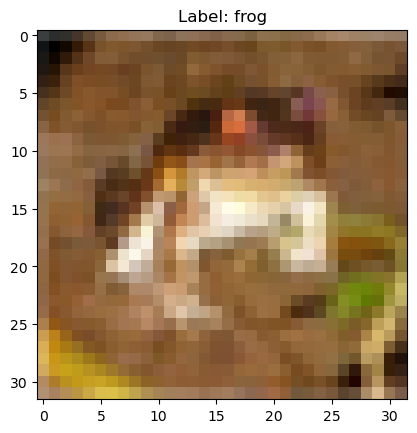

In [6]:
# 2. Load and Preprocess the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class labels
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Display a sample image
plt.imshow(x_train[0])
plt.title(f"Label: {class_names[y_train[0][0]]}")
plt.show()


In [7]:
# 3. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 4. Compile and Train the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=10, 
                    validation_data=(x_test, y_test_cat))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.3422 - loss: 1.7613 - val_accuracy: 0.5373 - val_loss: 1.2805
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5680 - loss: 1.2210 - val_accuracy: 0.6083 - val_loss: 1.1067
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6263 - loss: 1.0627 - val_accuracy: 0.6288 - val_loss: 1.0428
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6628 - loss: 0.9602 - val_accuracy: 0.6516 - val_loss: 0.9883
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.6877 - loss: 0.8848 - val_accuracy: 0.6696 - val_loss: 0.9445
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7134 - loss: 0.8248 - val_accuracy: 0.6783 - val_loss: 0.9283
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7344 - loss: 0.7688 - val_accuracy: 0.6872 - val_loss: 0.9191
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7494 -

In [9]:
# 5. Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 3s - 9ms/step - accuracy: 0.6957 - loss: 0.9123

Test accuracy: 0.70


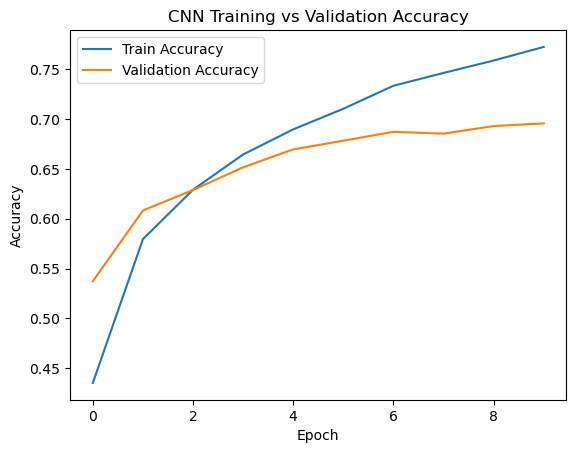

In [10]:
# 6. Plot Accuracy over Epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training vs Validation Accuracy')
plt.show()
